In [1]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jangdasom","key":"e9612a0622ced4937bdc4a1824676f59"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d alxmamaev/flowers-recognition

 97% 435M/450M [00:10<00:00, 40.5MB/s]
100% 450M/450M [00:10<00:00, 44.0MB/s]


In [ ]:
!unzip flowers-recognition.zip

In [5]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [6]:
'''loading data'''

X=[]
y=[]
imsize=128

for filename in os.listdir("./flowers/daisy"):
    try:
        path='./flowers/daisy/'+filename
        img=plt.imread(path)
        img=cv2.resize(img,(imsize,imsize))
        X.append(img)
        y.append(0)
    except:
        pass

for filename in os.listdir("./flowers/dandelion"):
    try:
        path='./flowers/dandelion/'+filename
        img=plt.imread(path)
        img=cv2.resize(img,(imsize,imsize))
        X.append(img)
        y.append(1)
    except:
        pass

for filename in os.listdir("./flowers/rose"):
    try:
        path='./flowers/rose/'+filename
        img=plt.imread(path)
        img=cv2.resize(img,(imsize,imsize))
        X.append(img)
        y.append(2)
    except:
        pass

for filename in os.listdir("./flowers/sunflower"):
    try:
        path='./flowers/sunflower/'+filename
        img=plt.imread(path)
        img=cv2.resize(img,(imsize,imsize))
        X.append(img)
        y.append(3)
    except:
        pass

for filename in os.listdir("./flowers/tulip"):
    try:
        path='./flowers/tulip/'+filename
        img=plt.imread(path)
        img=cv2.resize(img,(imsize,imsize))
        X.append(img)
        y.append(4)
    except:
        pass

In [7]:
X=np.array(X)
y=np.array(y)

In [8]:
X.shape

(4323, 128, 128, 3)

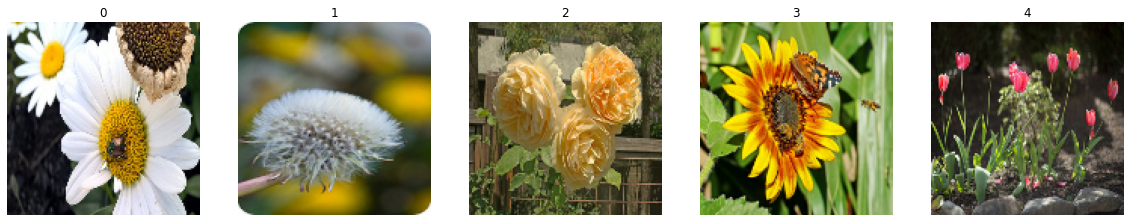

In [9]:
plt.figure(figsize=(20,20))

for c in range(5):
    plt.subplot(1,5,c+1)
    plt.imshow(X[1000*c])
    plt.title(y[1000*c])
    plt.axis("off")

In [10]:
'''one hot encoded lables'''
# y=tf.keras.utils.to_categorical(y,num_classes=5)

'one hot encoded lables'

In [21]:
'''spliting data'''
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.15)

In [22]:
X_train.shape

(3674, 128, 128, 3)

In [23]:
y_train.shape

(3674,)

In [15]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),padding="Same",activation="relu" , input_shape = (imsize,imsize,3)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=256,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(filters=512,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(1024,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(5,activation="softmax"))

In [14]:
'''data augmentation'''
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False,  
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False,  
    rotation_range=60, 
    zoom_range = 0.1,  
    width_shift_range=0.1,  
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode = "reflect"
    ) 
datagen.fit(X_train)

In [16]:
#model.summary()
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']) #compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy']) #compile model

In [17]:
epoch = 30
batch_size = 32

In [24]:
history = model.fit_generator(datagen.flow(X_train,y_train,batch_size=batch_size),
                              epochs= epoch,validation_data=(X_val,y_val),
                              steps_per_epoch=X_train.shape[0] // batch_size
                              )

Epoch 1/30
114/114 [==============================] - 15s 128ms/step - loss: 1.6108 - accuracy: 0.4522 - val_loss: 1.5599 - val_accuracy: 0.4884
Epoch 2/30
114/114 [==============================] - 14s 123ms/step - loss: 1.2621 - accuracy: 0.5253 - val_loss: 1.5450 - val_accuracy: 0.5763
Epoch 3/30
114/114 [==============================] - 14s 125ms/step - loss: 1.0891 - accuracy: 0.5835 - val_loss: 1.0292 - val_accuracy: 0.6194
Epoch 4/30
114/114 [==============================] - 14s 124ms/step - loss: 1.0066 - accuracy: 0.6227 - val_loss: 1.0681 - val_accuracy: 0.6102
Epoch 5/30
114/114 [==============================] - 14s 124ms/step - loss: 0.9370 - accuracy: 0.6392 - val_loss: 1.1896 - val_accuracy: 0.5932
Epoch 6/30
114/114 [==============================] - 14s 124ms/step - loss: 0.9195 - accuracy: 0.6483 - val_loss: 1.0268 - val_accuracy: 0.6040
Epoch 7/30
114/114 [==============================] - 14s 124ms/step - loss: 0.8849 - accuracy: 0.6628 - val_loss: 0.8977 - val_ac

In [28]:
model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([2, 0, 2, 0, 1, 0, 2, 3, 3, 0, 2, 2, 2, 0, 1, 1, 4, 1, 3, 4, 1, 3,
       2, 1, 2, 3, 4, 1, 0, 2, 0, 2, 2, 1, 3, 0, 0, 0, 1, 0, 2, 0, 1, 2,
       2, 3, 2, 2, 3, 0, 2, 0, 2, 2, 2, 0, 1, 4, 1, 4, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 2, 4, 1, 2, 1, 3, 3, 2, 1, 2, 2, 2, 0, 3, 4, 2, 3, 1,
       2, 0, 3, 3, 4, 2, 1, 2, 2, 3, 3, 2, 0, 3, 2, 0, 1, 0, 2, 1, 2, 1,
       0, 0, 4, 1, 3, 2, 1, 0, 0, 3, 2, 2, 1, 2, 1, 2, 0, 3, 1, 3, 1, 0,
       2, 1, 0, 0, 4, 2, 0, 2, 3, 0, 4, 3, 4, 3, 3, 2, 0, 2, 2, 1, 2, 1,
       0, 2, 2, 0, 0, 2, 3, 1, 2, 2, 4, 0, 1, 0, 2, 0, 0, 4, 2, 1, 1, 2,
       0, 1, 0, 0, 2, 2, 2, 0, 2, 3, 0, 0, 1, 2, 2, 2, 1, 3, 3, 2, 0, 0,
       2, 1, 4, 3, 0, 1, 0, 0, 3, 4, 0, 3, 2, 1, 4, 3, 2, 1, 3, 3, 2, 3,
       3, 1, 1, 2, 3, 2, 1, 0, 0, 0, 2, 0, 2, 0, 1, 3, 0, 2, 0, 4, 2, 1,
       3, 4, 4, 3, 4, 4, 0, 3, 0, 1, 2, 0, 2, 2, 3, 4, 1, 2, 1, 0, 2, 1,
       2, 3, 1, 1, 3, 3, 4, 2, 4, 3, 2, 2, 2, 3, 4, 0, 1, 4, 2, 2, 1, 1,
       3, 3, 2, 4, 2, 1, 2, 4, 1, 0, 4, 2, 3, 4, 2,

In [50]:
model.evaluate(X_test,y_test)

21/21 [==============================] - 0s 12ms/step - loss: 0.5586 - accuracy: 0.7889


[0.5585622191429138, 0.7889060378074646]

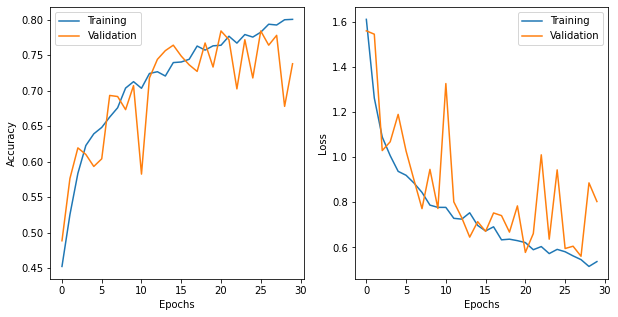

In [34]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(train_acc,label = "Training")
plt.plot(val_acc,label = 'Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss,label = 'Training')
plt.plot(val_loss,label = 'Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [47]:
model.save("./flowers-recognition.h5")

reference : https://www.kaggle.com/instalok/flowers-recognition-cnn